<a href="https://colab.research.google.com/github/nidhivanjare/Twitter_SA/blob/main/twitter_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flair 
import pandas as pd 
import flair

     |████████████████████████████████| 319 kB 7.0 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 19.7 MB 12.0 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 981 kB 50.6 MB/s 
     |████████████████████████████████| 1.2 MB 57.3 MB/s 
     |████████████████████████████████| 788 kB 61.1 MB/s 
     |████████████████████████████████| 2.9 MB 45.0 MB/s 
     |████████████████████████████████| 48 kB 6.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 955 kB/s 
     |████████████████████████████████| 636 kB 69.5 MB/s 
     |████████████████████████████████| 895 kB 69.0 MB/s 
     |████████████████████████████████| 3.3 MB 55.3 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=14f6b143186fc3cc3b6973535e29a559d1794caeb280c

In [2]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Dwyane Jonson 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/DwayneJonson.csv')

df

,Title,Title_URL,css4rbku5_URL,Date,css901oao1,css4rbku52,Tweet,Replies,Likes
0,Jon Ott,https://twitter.com/OriginalJLP,https://twitter.com/OriginalJLP/status/1310328...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,"Welcome to the crew, glad to have you with us.",3.0,30.0
1,Sacchidanand Shinde,https://twitter.com/sacchidanand_bs,https://twitter.com/sacchidanand_bs/status/131...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Love you rock,11.0,11.0
2,Jose,https://twitter.com/TripplegcG,https://twitter.com/TripplegcG/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,All the magatards mad,25.0,129.0
3,LegRah,https://twitter.com/afpanaccio,https://twitter.com/afpanaccio/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,NaN,1.0,69.0
4,Dane Zukes,https://twitter.com/ZRockwellD,https://twitter.com/ZRockwellD/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Does the J stand for Jabroni in Donald J Trump,14.0,14.0
...,...,...,...,...,...,...,...,...,...
193,Mr.Quagmire,https://twitter.com/Mr_Quagmire_USA,https://twitter.com/Mr_Quagmire_USA/status/131...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN
194,platypus puppet,https://twitter.com/platypuspuppet,https://twitter.com/platypuspuppet/status/1310...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,You are the best!,NaN,NaN
195,Nikki Fourtzialas,https://twitter.com/nFourtzi,https://twitter.com/nFourtzi/status/1310949844...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Ugh sorry to see you have fallen for their BS....,3.0,3.0
196,Jeannie919,https://twitter.com/jeanmc919,https://twitter.com/jeanmc919/status/131095294...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN


In [ ]:
# sentiment_model = flair.models.TextClassifier.load('en-sentiment')
sentiment_model = flair.models.TextClassifier.load('sentiment-fast')

2021-10-10 15:43:53,658 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn_v8.pt not found in cache, downloading to /tmp/tmpfjiktvb9


100%|██████████| 1241977025/1241977025 [00:47<00:00, 25882910.91B/s]

2021-10-10 15:44:42,012 copying /tmp/tmpfjiktvb9 to cache at /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


2021-10-10 15:44:46,478 removing temp file /tmp/tmpfjiktvb9
2021-10-10 15:44:46,652 loading file /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


In [ ]:
nan_value = float("NaN")
# Convert NaN values to empty string
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Tweet"], inplace=True)

In [ ]:

df1 = df.dropna(subset=['Tweet'])
df1 = df


df1['Replies'] = df1['Replies'].fillna(0)
df1['Likes'] = df1['Likes'].fillna(0)
# df1['Retweets'] = df1['Retweets'].fillna(0)


df_base = df1

index = df_base.index
number_of_rows = len(index)
print(number_of_rows)



161


## 1) Flair


In [ ]:

sentiment =[]
confidence = []

for tweet in df1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)

NameError: ignored

In [ ]:
df1['Sent'] = sentiment
df1['Score'] = confidence

In [ ]:
Positive = 0
Negative = 0
acc_score = 0

for c in df1['Sent']:
  if c == 'POSITIVE':
    a =  df1['Likes']
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
    a = -(df1['Likes'])
  acc_score = acc_score + a
 

print(Positive , Negative)

total_likes = 372700

Retweet = 75800


Influence_DJ = ((161 * (Positive-Negative)) + (total_likes+Retweet))

print(Influence_DJ , acc_score)


91 70
451881 0       630.0
1       231.0
2      2709.0
4       294.0
5       294.0
        ...  
191       0.0
192      21.0
194       0.0
195      63.0
197       0.0
Name: Likes, Length: 161, dtype: float64


In [ ]:
df2 = df_base


## 2) NLTK

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.8176}


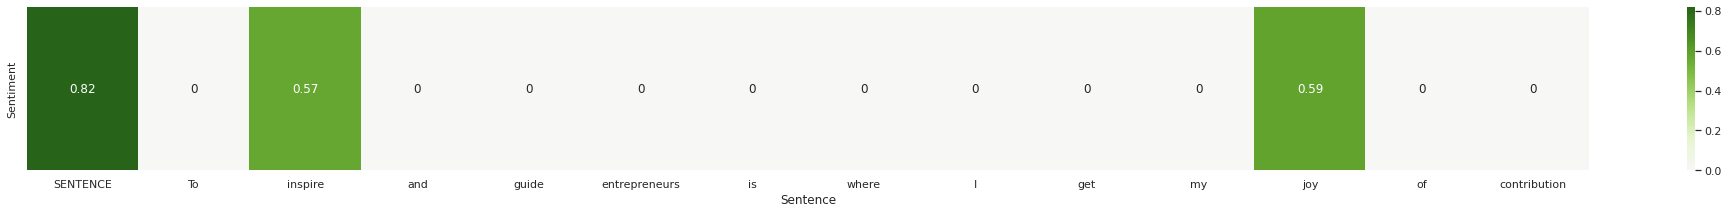

In [ ]:

# import libraries
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import model
nltk.download('vader_lexicon')

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize 
def visualize_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# sentiment analysis
sid = SentimentIntensityAnalyzer()

# call method 
print(sid.polarity_scores(sentence))

# heatmap 
visualize_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.205, 'neu': 0.4, 'pos': 0.395, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.235, 'neu': 0.698, 'pos': 0.067, 'compound': -0.7003}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
{'neg': 0.069, 'neu': 0.554, 'pos': 0.377, 'compound': 0.8979}
{'neg': 0.118, 'neu': 0.7, 'pos': 0.182, 'compound': 0.5411}
{'neg': 0.133, 'neu': 0.696, 'pos': 0.171, 'compound': 0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

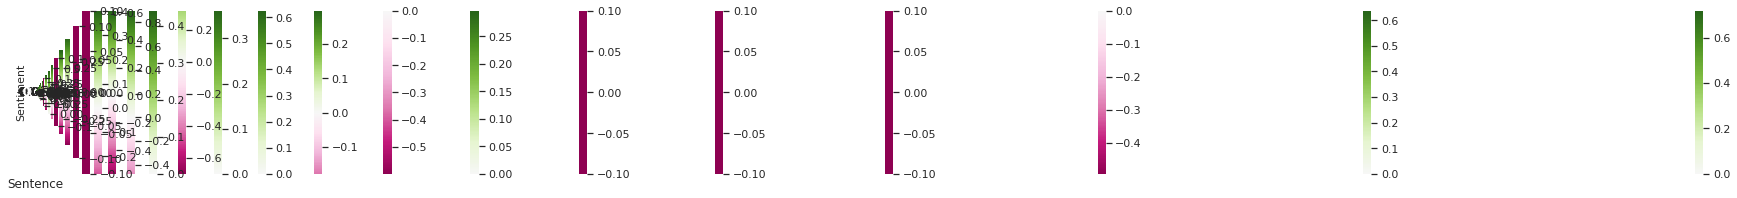

In [ ]:
df3 = df_base
negative = 0
positive = 0
neutral = 0
acc_score = 0



for tweet in df3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])

  var = max(lst)

  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = df3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(df3['Likes'])
    negative += 1

  acc_score = acc_score + a


# print(positive , negative ,neutral)
Influence_DJ = ((161 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_DJ , acc_score)

## 3) TEXTBLOB

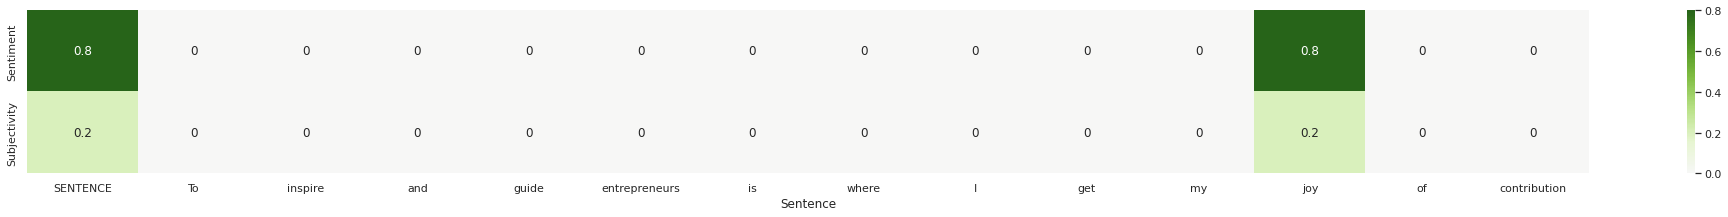

In [ ]:


# import libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# model
TextBlob(sentence).sentiment

# visualization
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

##Polarity > 0 -> Positive 
##Polarity < 0 -> Negative
##Polarity = 0 -> Neutral

Sentiment(polarity=0.65, subjectivity=0.95)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.20833333333333331, subjectivity=0.43333333333333335)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.08750000000000001, subjectivity=0.39999999999999997)
Sentiment(polarity=0.08333333333333334, subjectivity=0.5833333333333333)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.41666666666666663, subjectivity=0.6944444444444444)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.05000000000000001, subjectivity=0.85)
Sentiment(polarity=-0.0697916666666667, subjectivity=0.740625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.4

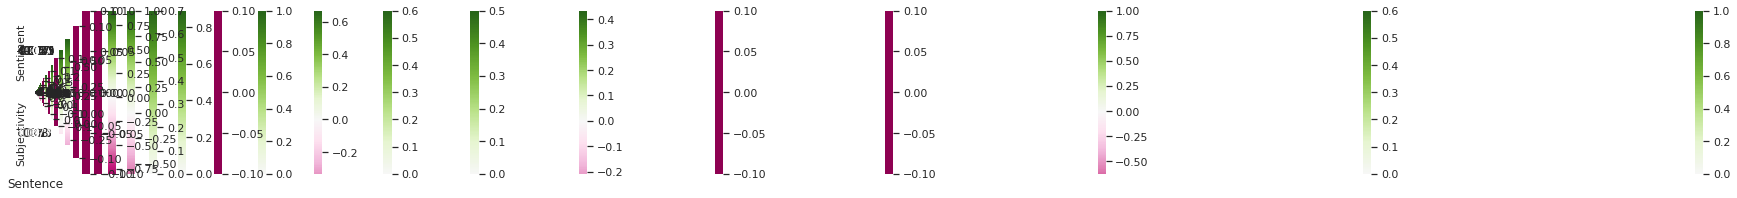

In [ ]:
df4 = df_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0

for tweet in df4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a =  df4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(df4['Likes'])

  acc_score = acc_score + a
  


print(positive1 , negative1 , neutral1)

Influence_DJ = ((161 * (positive1-negative1)) + (total_likes+Retweet))

print(Influence_DJ , acc_score)


## 4) XgBoost - Algorithmia


In [ ]:
!pip install algorithmia
import Algorithmia

input = "I am glad that I bought this. It works great!"
client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
algo.set_options(timeout=20) # optional

     |████████████████████████████████| 150 kB 50.8 MB/s 


In [ ]:

df5 = df_base
neg = 0
pos = 0
acc_score = 0


for tweet in df5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
    a = -(df5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = df5['Likes'] 
  

  acc_score = acc_score + a

print(neg,pos)

Influence_DJ = ((161 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_DJ , acc_score)



    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 

#Taylor Swift

In [ ]:
TS = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/TaylorSwift.csv')
TS

,Title,Date,Text,Tweets,Replies,Likes,Retweets
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240.0,6.0
1,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,NaN,NaN,NaN
2,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,QUEEN,2.0,496.0,9.0
3,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,5.0,46.0,2.0
4,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,So proud to be a Swiftie! I voted on Friday as...,12.0,109.0,1.0
...,...,...,...,...,...,...,...
182,Louis Norman,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,God Americans get so angry when anyone who is ...,1.0,3.0,NaN
183,liz,NaN,NaN,@JoeBiden\n would love to have a party with yo...,5.0,9.0,1.0
184,NaN,NaN,NaN,Another bad choice in a man. He would love to ...,2.0,10.0,NaN
185,NaN,NaN,NaN,Nice! You had your servant make you cookies th...,3.0,3.0,NaN


In [ ]:
ts1 = TS.dropna(subset=['Tweets'])

nan_value = float("NaN")
# Convert NaN values to empty string
ts1.replace("", nan_value, inplace=True)
ts1.dropna(subset = ["Tweets"], inplace=True)

ts1['Replies'] = ts1['Replies'].fillna(0)
ts1['Likes'] = ts1['Likes'].fillna(0)
ts1['Retweets'] = ts1['Retweets'].fillna(0)


Ts_base = ts1
Ts_base

index = Ts_base.index
number_of_rows = len(index)
print(number_of_rows)






/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: ignored

In [ ]:
sentiment =[]
confidence = []

for tweet in ts1['Tweets']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



ts1['Sent'] = sentiment
ts1['Score'] = confidence
ts1

## 1) Flair

In [ ]:
Positive = 0
Negative = 0
acc_score = 0
a =0 

for c in ts1['Sent']:
  if c == 'POSITIVE':
    print(ts1['Replies'])
    Positive += 1
    a = ts1['Replies'] + ts1['Likes']
  if c == 'NEGATIVE':
    Negative += 1
    a = - (ts1['Replies'] + ts1['Likes'])
  acc_score = acc_score + a

Retweet = 59700

total_likes = 396300

print(Positive , Negative)


Influence_TS = ((164 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_TS , acc_score)

KeyError: ignored

## 2) NKTL


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7882}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7882}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6531}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
{'neg': 0.176, 'neu': 0.751, 'pos': 0.073, 'compound': -0.6369}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.7324}


KeyError: ignored

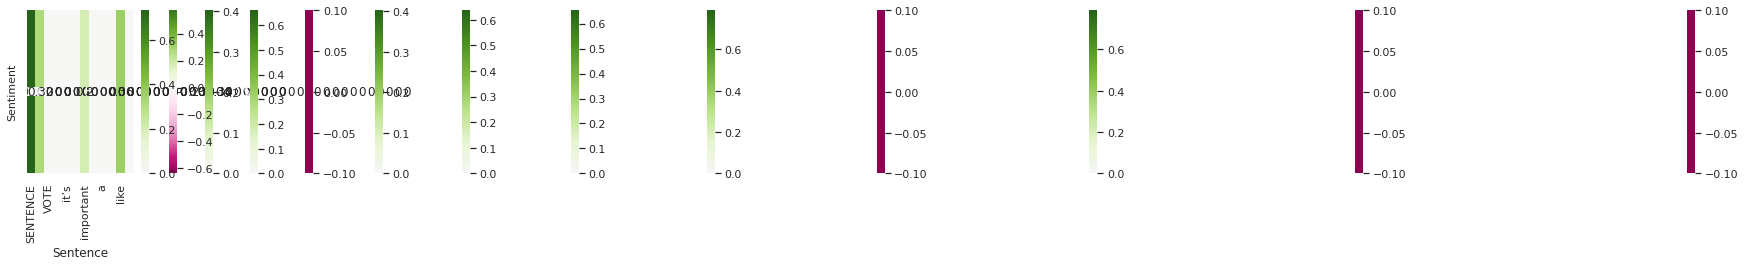

In [ ]:
ts3 = Ts_base
negative = 0
positive = 0
neutral = 0
acc_score = 0
a = 0

for tweet in ts3['Tweets']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
    a = ts3['Replies'] + ts3['Likes']
  if(var == name['neg'] ):
    negative += 1
    a = -(ts3['Replies'] + ts3['Likes'])
  acc_score = acc_score + a

print(positive ,negative ,  neutral)
Influence_TS = ((164 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_TS , acc_score)

## 3) Text Blob 

In [ ]:
ts4 = Ts_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in ts4['Tweets']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1


print(positive1 ,negative1 , neutral1 )
Influence_TS = ((164 * (positive1-negative1)) + (total_likes+Retweet))
print(Influence_TS)


## 4) XgBoost - Algorithmia


In [ ]:
ts5 = Ts_base
neg = 0
pos = 0

for tweet in ts5['Tweets']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_TS = ((164 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_TS)
    

# Mark Cuban 

In [ ]:
MC = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/MarkCuban.csv')
MC

,Text,Date,Tweet,Replies,Likes,Retweets
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600.0,455.0
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2.0,NaN
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1.0,NaN
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2.0,NaN
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8.0,NaN
...,...,...,...,...,...,...
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,NaN,NaN
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,NaN,NaN
136,Vanna Zimmerman,"Nov 2, 2020",TrumpPence2020,NaN,NaN,NaN
137,Humanitarian Human,"Nov 2, 2020","V O T E 4 T R U M P:\n\n@mcuban\n, your vo...",NaN,2.0,NaN


In [ ]:
mc1 = MC.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
mc1.replace("", nan_value, inplace=True)
mc1.dropna(subset = ["Tweet"], inplace=True)

mc1['Replies'] = mc1['Replies'].fillna(0)
mc1['Likes'] = mc1['Likes'].fillna(0)
mc1['Retweets'] = mc1['Retweets'].fillna(0)

Mc_base = mc1
Mc_base


index = Mc_base.index
number_of_rows = len(index)
print(number_of_rows)

125


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/pytho

## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in mc1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


mc1['Sent'] = sentiment
mc1['Score'] = confidence
mc1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600.0,455.0,NEGATIVE,0.985232
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2.0,0.0,NEGATIVE,0.922834
2,Nolan6,"Nov 2, 2020",I love u mark,0.0,1.0,0.0,POSITIVE,0.992436
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,0.0,2.0,0.0,NEGATIVE,0.826676
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,0.0,8.0,0.0,NEGATIVE,0.991434
...,...,...,...,...,...,...,...,...
133,The Golden Age,"Nov 2, 2020",Fuck off. We’re in \n@realDonaldTrump,0.0,0.0,0.0,NEGATIVE,0.979880
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,0.0,0.0,0.0,POSITIVE,0.537633
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,0.0,0.0,0.0,NEGATIVE,0.999857
136,Vanna Zimmerman,"Nov 2, 2020",TrumpPence2020,0.0,0.0,0.0,POSITIVE,0.659929


In [ ]:
Positive = 0
Negative = 0
acc_score = 0 
a = 0 

for c in mc1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
    a = mc1['Replies'] + mc1['Likes']
  if c == 'NEGATIVE':
    Negative += 1
    a = -(mc1['Likes'] + mc1['Replies'])
  acc_score = acc_score + a

Retweet = 1069

total_likes = 9855

print(Positive , Negative)

Influence_MC = ((125 * (Positive-Negative)) + (total_likes+Retweet))

print(Influence_MC , acc_score)

58 67
9799 0     -61425.0
1        -36.0
2         -9.0
3        -18.0
4        -72.0
        ...   
133        0.0
134        0.0
135        0.0
136        0.0
137      -18.0
Length: 125, dtype: float64


## 2) NLTK

{'neg': 0.118, 'neu': 0.789, 'pos': 0.092, 'compound': -0.1531}
{'neg': 0.114, 'neu': 0.642, 'pos': 0.244, 'compound': 0.3915}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.16, 'neu': 0.71, 'pos': 0.13, 'compound': -0.1285}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.227, 'neu': 0.637, 'pos': 0.136, 'compound': -0.2481}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.349, 'neu': 0.458, 'pos': 0.194, 'compound': -0.6939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'co

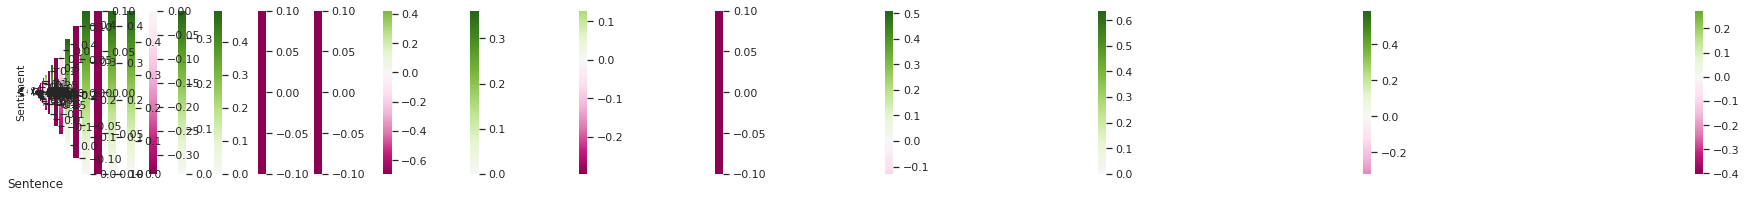

In [ ]:
mc3 = Mc_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in mc3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = mc3['Replies'] + mc3['Likes']
    positive += 1
  if(var == name['neg'] ):
    negative += 1
    a = -(mc3['Replies'] + mc3['Likes'])

  acc_score = acc_score + a


print(positive ,negative , neutral )

Influence_MC = ((125 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_MC , acc_score)

## 3) TEXT BLOB

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.175, subjectivity=0.525)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentim

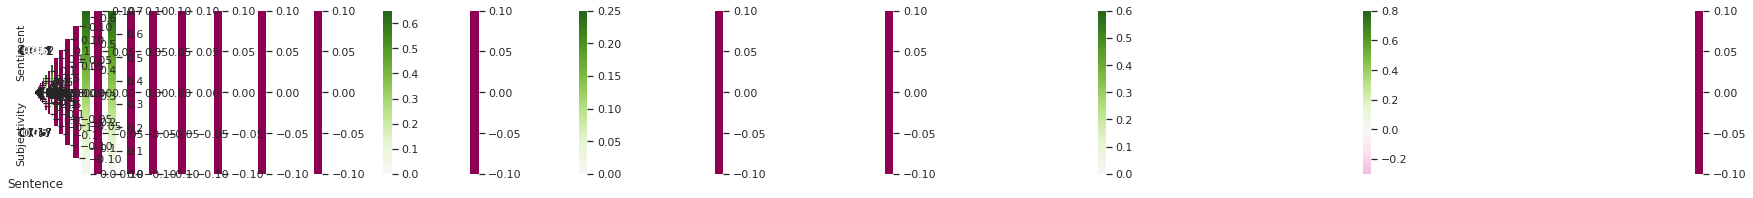

In [ ]:
mc4 = Mc_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in mc4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = mc4['Replies'] + mc4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(mc4['Replies'] + mc4['Likes'])
  acc_score = acc_score + a


print(positive1 ,negative1 ,neutral1)

Influence_MC = ((125 * (positive1-negative1)) + (total_likes+Retweet))

print(Influence_MC, acc_score )




## 4) XGBOOST - ALOGRITHMA

In [ ]:
mc5 = Mc_base
neg = 0
pos = 0
acc_score = 0


for tweet in mc5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
    a = -(mc5['Replies'] + mc5['Likes'] )
  if var['sentiment'] == 1:
    pos +=1
    a = mc5['Replies'] + mc5['Likes'] 

  acc_score = acc_score + a

print(pos , neg)
Influence_MC = ((125 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_MC , acc_score)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

# JOHN LEGEND 

In [ ]:
JL1 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend1.csv')
JL1


,Text,Date,Tweet,Replies,Likes,Retweets
0,JJ,"Jul 26, 2020",Bro why,3.0,16.0,1.0
1,Deborah,"Jul 26, 2020",NaN,NaN,4.0,1.0
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10.0,1.0
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5.0,2.0
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6.0,NaN
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7.0,NaN
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3.0,NaN
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32.0,NaN
8,Name cannot be blank,"Jul 26, 2020",NaN,NaN,NaN,NaN
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,NaN,NaN


In [ ]:
JL2 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend2.csv')
JL2

,Text,Date,Tweet,Replies,Likes,Retweets
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,NaN
1,DB,"Oct 24, 2020",Thank you!,NaN,2.0,NaN
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6.0,NaN
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,NaN
4,Mrs. Felton,"Oct 24, 2020",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1.0,NaN
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,NaN,NaN
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,NaN,NaN
84,Icantbefrench,"Oct 25, 2020",NaN,NaN,NaN,NaN


In [ ]:
jl11 = JL1.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl11.replace("", nan_value, inplace=True)

jl11.dropna(subset = ["Tweet"], inplace=True)

jl11['Replies'] = jl11['Replies'].fillna(0)
jl11['Likes'] = jl11['Likes'].fillna(0)
jl11['Retweets'] = jl11['Retweets'].fillna(0)

Jl1_base = jl11
Jl1_base


index = Jl1_base.index
number_of_rows = len(index)
print(number_of_rows)

32


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-pac

In [ ]:
jl21 = JL2.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl21.replace("", nan_value, inplace=True)


jl21.dropna(subset = ["Tweet"], inplace=True)

jl21['Replies'] = jl21['Replies'].fillna(0)
jl21['Likes'] = jl21['Likes'].fillna(0)
jl21['Retweets'] = jl21['Retweets'].fillna(0)

Jl2_base = jl21
Jl2_base

index = Jl2_base.index
number_of_rows = len(index)
print(number_of_rows)

69


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__

## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in jl11['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl11['Sent'] = sentiment
jl11['Score'] = confidence
jl11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,JJ,"Jul 26, 2020",Bro why,3.0,16.0,1.0,POSITIVE,0.518833
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10.0,1.0,NEGATIVE,0.933596
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,0.0,5.0,2.0,POSITIVE,0.893769
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6.0,0.0,POSITIVE,0.856556
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7.0,0.0,POSITIVE,0.981077
6,Sea Johnston,"Jul 26, 2020",Thank you john.,0.0,3.0,0.0,POSITIVE,0.864997
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32.0,0.0,NEGATIVE,0.589097
9,Redd Handed Music,"Jul 26, 2020",You would,0.0,0.0,0.0,POSITIVE,0.873021
10,John S,"Jul 27, 2020",#Biden2020 #DumpTrump,0.0,1.0,0.0,POSITIVE,0.856556
11,DawnandherloverCindy,"Jul 27, 2020",I love you \n@johnlegend\n almost as much as I...,2.0,3.0,0.0,POSITIVE,0.991236


In [ ]:
sentiment =[]
confidence = []

for tweet in jl21['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl21['Sent'] = sentiment
jl21['Score'] = confidence
jl21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,0.0,POSITIVE,0.746248
1,DB,"Oct 24, 2020",Thank you!,0.0,2.0,0.0,POSITIVE,0.970455
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",0.0,6.0,0.0,POSITIVE,0.993917
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,0.0,POSITIVE,0.962213
6,Sean O'Hearn Gay,"Oct 24, 2020",YAAAAASSSSSS,1.0,3.0,0.0,POSITIVE,0.659929
...,...,...,...,...,...,...,...,...
80,Al Patriot,"Oct 25, 2020",A vote for Biden is a vote for a Pedophile and...,0.0,0.0,0.0,NEGATIVE,0.913746
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,0.0,1.0,0.0,NEGATIVE,0.975607
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,0.0,0.0,0.0,POSITIVE,0.800517
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,0.0,0.0,0.0,POSITIVE,0.817045


In [ ]:
Positive1 = 0
Negative1 = 0
Positive2 = 0
Negative2 = 0
acc_score1 = 0
acc_score2 = 0

for c in jl11['Sent']:
  if c == 'POSITIVE':
    Positive1 += 1
    a = jl11['Replies'] + jl11['Likes']
  if c == 'NEGATIVE':
    Negative1 += 1
    a = -(jl11['Replies'] + jl11['Likes'])
  acc_score1 = acc_score1 + a


for c in jl21['Sent']:
  if c == 'POSITIVE':
    Positive2 += 1
    a = jl21['Replies'] + jl21['Likes']
  if c == 'NEGATIVE':
    Negative2 += 1
    a = -(jl21['Replies'] + jl21['Likes'])
  acc_score2 = acc_score2 + a


Retweet1 =  569 

total_likes1 = 4800 

Retweet2 =   1000

total_likes2 =  5500



print(Positive , Negative)


Influence_JL1 = ((32 * (Positive1-Negative1)) + (total_likes1+Retweet1))


Influence_JL2 = ((69 * (Positive2-Negative2)) + (total_likes2+Retweet2))

acc_score = (acc_score2 + acc_score1 )/2


Influence_JL =(Influence_JL1 + Influence_JL2)/2

print(Influence_JL , acc_score)

67 34
6851.0 0     156.0
1       NaN
2     129.0
3     135.0
4       NaN
      ...  
80      NaN
81      NaN
82      NaN
83      NaN
85      NaN
Length: 77, dtype: float64


## 2) NLTK

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.55, 'neu': 0.45, 'pos': 0.0, 'compound': -0.7269}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8122}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8555}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.141, 'neu': 0.633, 'pos': 0.226, 'compound': 0.5658}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

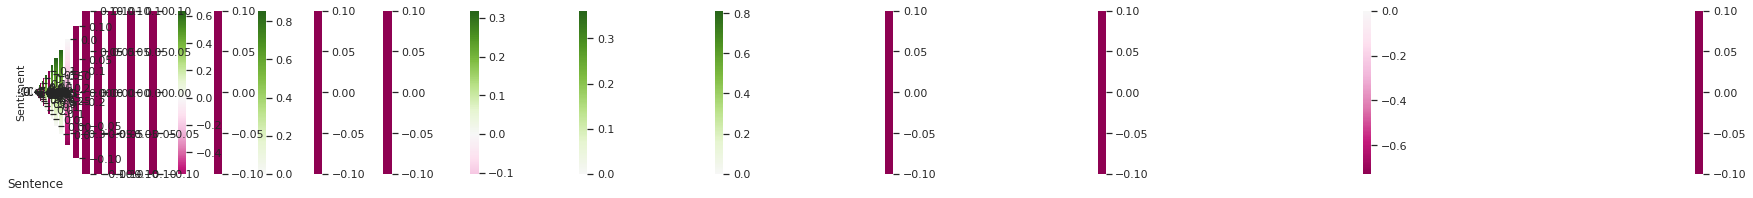

In [ ]:
jl13 = Jl1_base
jl23 = Jl2_base

negative1 = 0
positive1= 0
negative2 = 0
positive2 = 0
neutral1 = 0
neutral2 = 0
acc_score1 = 0
acc_score2 = 0


for tweet in jl13['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral1 += 1
  if(var == name['pos'] ):
    positive1 += 1
    a = jl13['Replies'] + jl13['Likes']
  if(var == name['neg'] ):
    negative1 += 1
    a = -(jl13['Replies'] + jl13['Likes'])
  acc_score1 = acc_score1 + a

for tweet in jl23['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral2 += 1
  if(var == name['pos'] ):
    positive2 += 1
    a = jl23['Replies'] + jl23['Likes']
  if(var == name['neg'] ):
    negative2 += 1
    a = -(jl23['Replies'] + jl23['Likes'])
  acc_score2 = acc_score2 + a

acc_score = (acc_score2 + acc_score1)/2

Influence_JL1 = ((32 * (positive1-negative1)) + (total_likes1+Retweet1)) 
Influence_JL1 = ((69 * (positive2-negative2)) + (total_likes2+Retweet2)) 
Influence_JL = (Influence_JL1 + Influence_JL2)/2

print(Influence_JL, acc_score)

## 3) TEXTBLOB


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.33999999999999997, subjectivity=0.54)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.10000000000000002, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0

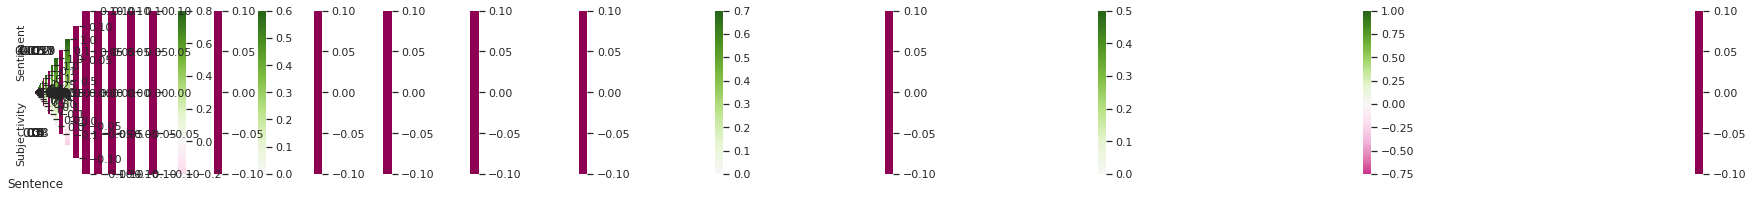

In [ ]:
jl24 = Jl2_base
jl14 = Jl1_base

negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0

negative2 = 0
positive2 = 0
neutral2 = 0
acc_score2 = 0


for tweet in jl14['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = jl14['Replies'] + jl14['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(jl14['Replies'] + jl14['Likes'])
  acc_score1 = acc_score1 + a


for tweet in jl24['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive2 += 1
    a = jl24['Replies'] + jl24['Likes']
  if(name1.polarity == 0.0 ):
    neutral2 += 1
  if(name1.polarity < 0.0):
    negative2 += 1
    a = -(jl24['Replies'] + jl24['Likes'])
    
  acc_score2 = acc_score2 + a

Influence_JL1 = ((32 * (positive1-negative1)) + (total_likes1 + Retweet1))
Influence_JL2 = ((69 * (positive2-negative2)) + (total_likes1 + Retweet1))


Influence_JL = (Influence_JL1 + Influence_JL2)/2


acc_score = (acc_score1 + acc_score2)/2

print(Influence_JL,acc_score) 

## 4) XGBOOST ALGORITHMA 

In [ ]:
jl15 = Jl1_base
jl25 = Jl2_base

neg1 = 0
pos1 = 0
acc_score1 = 0

neg2 = 0
pos2 = 0
acc_score2 = 0




for tweet in jl15['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg1 +=1
    a = -(jl15['Replies'] + jl15['Likes'] )
  if var['sentiment'] == 1:
    pos1 +=1
    a = jl15['Replies'] + jl15['Likes'] 
  acc_score1 = acc_score1 + a



for tweet in jl25['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg2 +=1
    a = -(jl25['Replies'] + jl25['Likes'] )
  if var['sentiment'] == 1:
    pos2 +=1
    a = jl25['Replies'] + jl25['Likes'] 
  acc_score2 = acc_score2 + a

print(pos1 ,neg1 , pos2 , neg2)

Influence_JL1 = (( 32 * (pos1-neg1)) + (total_likes1 + Retweet1)) 
Influence_JL2 = (( 69 * (pos2-neg2)) + (total_likes2 + Retweet2)) 

Influence_JL = (Influence_JL1 + Influence_JL2)/2
acc_score = (acc_score1 + acc_score2)/2

print(Influence_JL,acc_score)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

#Jennifer Hudson

In [ ]:
JH = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JenniferHudson.csv')
JH

,Name,Date,Tweet,Likes,Retweets,Replies
0,ScorpionGoddess,Jan 20,NaN,NaN,NaN,NaN
1,Joseph Rainone Jr.,Jan 20,"Amen Jennifer, may God bless them.",1.0,NaN,NaN
2,jeniffer tilly | barbia era,Jan 20,in a perfect world you would’ve replaced jlow ...,3.0,NaN,NaN
3,Aaron Howlett,Jan 20,A turning point for America .,1.0,NaN,NaN
4,kathy thurman,Jan 20,Yes!,NaN,NaN,NaN
5,Camelsinkagools(CIK),Jan 21,Wow impressive.. decency,NaN,NaN,NaN
6,Farris Flagg,Jan 21,They should've asked you to perform at the #In...,NaN,NaN,NaN
7,Rolo,Jan 21,After 4 years of delusion and confusion we kno...,NaN,NaN,NaN
8,Darren Lewis,Jan 31,Really.... Reset being the key word! Evil...,NaN,NaN,NaN
9,Punky74,Feb 9,I just read the most beautiful story of what P...,1.0,NaN,NaN


In [ ]:
jh1 = JH.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jh1.replace("", nan_value, inplace=True)

jh1.dropna(subset = ["Tweet"], inplace=True)

jh1['Replies'] = jh1['Replies'].fillna(0)
jh1['Likes'] = jh1['Likes'].fillna(0)
jh1['Retweets'] = jh1['Retweets'].fillna(0)

Jh_base = jh1
Jh_base

index = Jh_base.index
number_of_rows = len(index)
print(number_of_rows)



27


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-pac

In [ ]:
sentiment =[]
confidence = []

for tweet in jh1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



jh1['Sent'] = sentiment
jh1['Score'] = confidence
jh1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,Tweet,Likes,Retweets,Replies,Sent,Score
1,Joseph Rainone Jr.,Jan 20,"Amen Jennifer, may God bless them.",1.0,0.0,0.0,POSITIVE,0.963991
2,jeniffer tilly | barbia era,Jan 20,in a perfect world you would’ve replaced jlow ...,3.0,0.0,0.0,POSITIVE,0.903754
3,Aaron Howlett,Jan 20,A turning point for America .,1.0,0.0,0.0,NEGATIVE,0.705314
4,kathy thurman,Jan 20,Yes!,0.0,0.0,0.0,POSITIVE,0.964498
5,Camelsinkagools(CIK),Jan 21,Wow impressive.. decency,0.0,0.0,0.0,POSITIVE,0.959106
6,Farris Flagg,Jan 21,They should've asked you to perform at the #In...,0.0,0.0,0.0,NEGATIVE,0.996401
7,Rolo,Jan 21,After 4 years of delusion and confusion we kno...,0.0,0.0,0.0,POSITIVE,0.929273
8,Darren Lewis,Jan 31,Really.... Reset being the key word! Evil...,0.0,0.0,0.0,POSITIVE,0.504636
9,Punky74,Feb 9,I just read the most beautiful story of what P...,1.0,0.0,0.0,POSITIVE,0.564063
10,Polson24,Jan 21,"May God bless, direct, protect, and guide Pres...",0.0,0.0,0.0,POSITIVE,0.996264


##1) flair


In [ ]:
Positive = 0
Negative = 0
acc_score = 0


for c in jh1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
    a = jh1['Replies'] + jh1['Likes']
  if c == 'NEGATIVE':
    Negative += 1
    a = -(jh1['Replies'] + jh1['Likes'])
  acc_score = acc_score + a

Retweet = 169

total_likes = 2400

print(Positive , Negative)


Influence_JH = (( 27 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JH,acc_score)

21 6
2974 1     15.0
2     45.0
3     15.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9     15.0
10     0.0
12    60.0
13    60.0
14     0.0
16     0.0
17     0.0
18    45.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24    15.0
26    15.0
27     0.0
28     0.0
29    60.0
30     0.0
dtype: float64


##2) NKTL

{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.5994}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4574}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.058, 'neu': 0.727, 'pos': 0.215, 'compound': 0.6486}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9403}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.7783}
{'neg': 0.149, 'neu': 0.732, 'pos': 0.119, 'compound': 0.4501}
{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.7574}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
{'neg': 0.046, 'neu': 0.744, 'pos': 0.21, 'compound': 0.8718}
{'neg': 0.079, 'neu': 0.495, 'pos': 0.425, 'compound': 0.976}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 

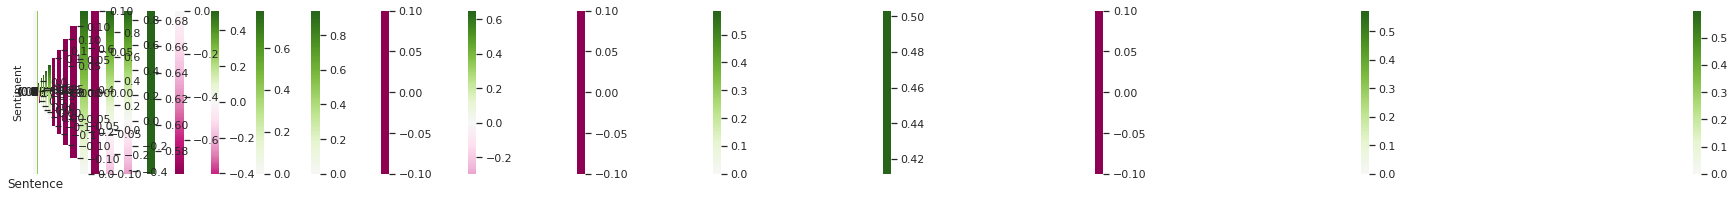

In [ ]:
jh3 = Jh_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in jh3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
    a = jh3['Replies'] + jh3['Likes']
  if(var == name['neg'] ):
    negative += 1
    a = -(jh3['Replies'] + jh3['Likes'])
  acc_score = acc_score + a


print(positive , negative , neutral)
Influence_JH = ((27 * (positive-negative)) + (total_likes+Retweet)) 
print(Influence_JH,acc_score)

##3) Textblob

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.26666666666666666, subjectivity=0.7333333333333334)
Sentiment(polarity=0.5193181818181818, subjectivity=0.6613636363636364)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.09583333333333333, subjectivity=0.5041666666666667)
Sentiment(polarity=-0.75, subjectivity=0.95)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.31174603174603177, subjectivity=0.5977777777777777)
Sentiment(polarity=0.82, subjectivity=0.6399999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


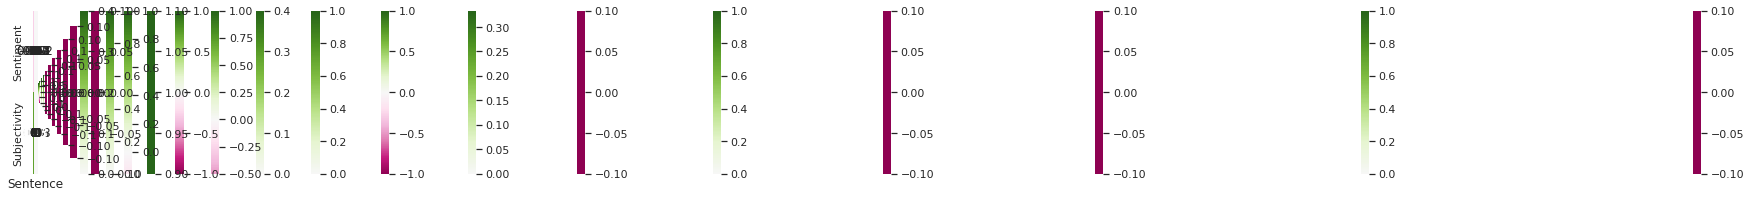

In [ ]:
jh4 = Jh_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in jh4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = jh4['Replies'] + jh4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(jh4['Replies'] + jh4['Likes'])
  acc_score = acc_score + a


print(positive1,negative1,neutral1)

Influence_JH = ((27 * (positive1-negative1)) + (total_likes + Retweet)) 

print(Influence_JH,acc_score)

##4) xg_boost algorithma 

In [ ]:
jh5 = Jh_base
neg = 0
pos = 0



for tweet in jh5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
    a = -(jh5['Replies'] + jh5['Likes'])
  if var['sentiment'] == 1:
    pos +=1
    a = jh5['Replies'] + jh5['Likes']

  acc_score = acc_score + a
    
print(pos,neg)

Influence_JH = ((27 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JH , acc_score)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
27 0
3298 1      48.0
2     144.0
3      48.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9      48.0
10      0.0
12    192.0
13    192.0
14      0.0
16      0.0
17      0.0
18    144.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24     48.0
26     48.0
27      0.0
28      0.0
29    192.0
30      0.0
dtype: float64


#Conor Mcgregor

In [ ]:
CM = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/ConorMcgregor.csv')
CM

,Name,Date,ReplyingTo,Replies,Retweets,Likes,Tweet
0,Rosanna Conservative,"Jan 21, 2020",NaN,14.0,14.0,236,...and I love it
1,せいじ Seiji,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,8.0,8.0,419,YES BABY MCGREGOR IS REDPILLED AND ALL IS GOOD
2,This Tweet is from a suspended account.,NaN,NaN,NaN,NaN,NaN,NaN
3,Der Dusel,"Jan 21, 2020",NaN,28.0,NaN,28,he already gave him all the smoke
4,Fresh,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,4.0,4.0,3,I pray your account has been hacked
...,...,...,...,...,...,...,...
161,NaN,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,NaN,NaN
162,NaN,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,2,NaN
163,PJ,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,2.0,2.0,9,Any chance the Brits could claim him?\n\nThe I...
164,mark schade aka Spanky Dennison,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,1,Feet? Really? Like bonespurs?


In [ ]:
cm1 = CM.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
cm1.replace("", nan_value, inplace=True)
cm1.dropna(subset = ["Tweet"], inplace=True)

cm1['Replies'] = cm1['Replies'].fillna(0)
cm1['Likes'] = cm1['Likes'].fillna(0)
cm1['Retweets'] = cm1['Retweets'].fillna(0)

# cm1['Retweets'].apply(lambda x: str(x))
# cm1['Likes'].apply(lambda x: str(x))


cm1.Retweets = (cm1.Retweets.replace(r'[KM]+$', '', regex=True).astype(float) *\
          cm1.Retweets.astype(str).str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(float))

cm1.Likes = (cm1.Likes.replace(r'[KM]+$', '', regex=True).astype(float) *\
          cm1.Likes.astype(str).str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(float))


cm1['Retweets'].apply(lambda x: float(x))
cm1['Likes'].apply(lambda x: float(x))

Cm_base = cm1
Cm_base

index = Cm_base.index
number_of_rows = len(index)
print(number_of_rows)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/pytho

TypeError: ignored

In [ ]:

sentiment =[]
confidence = []

for tweet in cm1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


cm1['Sent'] = sentiment
cm1['Score'] = confidence
cm1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,ReplyingTo,Replies,Retweets,Likes,Tweet,Sent,Score
0,Rosanna Conservative,"Jan 21, 2020",NaN,14.0,14.0,236,...and I love it,POSITIVE,0.998939
1,せいじ Seiji,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,8.0,8.0,419,YES BABY MCGREGOR IS REDPILLED AND ALL IS GOOD,POSITIVE,0.972151
3,Der Dusel,"Jan 21, 2020",NaN,28.0,0.0,28,he already gave him all the smoke,NEGATIVE,0.854651
4,Fresh,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,4.0,4.0,3,I pray your account has been hacked,NEGATIVE,0.940701
5,Nick Smith,"Jan 21, 2020",NaN,1.0,1.0,2,Nope sorry liberal accept the reality,NEGATIVE,0.878698
...,...,...,...,...,...,...,...,...,...
159,aimee moloney,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,1.0,5,2 absolute plonkers!,NEGATIVE,0.979702
160,MartialMind,"Jan 23, 2020",NaN,0.0,0.0,0,"Brain injury. No easy ""feet"" is about right.",NEGATIVE,0.915468
163,PJ,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,2.0,2.0,9,Any chance the Brits could claim him?\n\nThe I...,POSITIVE,0.708717
164,mark schade aka Spanky Dennison,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,0.0,1,Feet? Really? Like bonespurs?,NEGATIVE,0.959713


##1) flair

In [ ]:
Positive = 0
Negative = 0
acc_score = 0

for c in cm1['Sent']:
  if c == 'POSITIVE':
    a = float(cm1['Replies']) + float(cm1['Likes'])
    Positive += 1
  if c == 'NEGATIVE':
    a = -(float(cm1['Replies']) + float(cm1['Likes']))
    Negative += 1

  acc_score = acc_score + a

Retweet = 19000

total_likes = 100200

print(Positive , Negative)

Influence_CM = (( 140 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_CM,acc_score)

TypeError: ignored

##2) NLTK

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}


TypeError: ignored

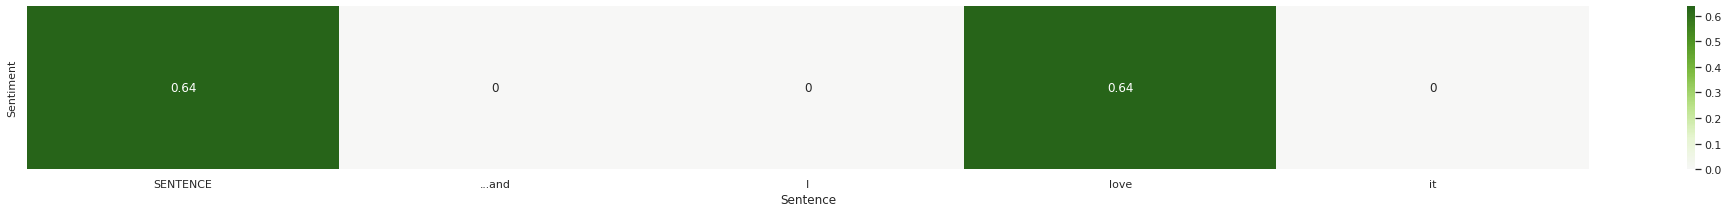

In [ ]:
 cm3 = Cm_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in cm3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)

  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = cm3['Replies'] + cm3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(cm3['Replies'] + cm3['Likes'])
    negative += 1

  acc_score = acc_score + a

print(positive , negative , neutral)

Influence_CM = (( 140 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_CM,acc_score)

##3) textblob

Sentiment(polarity=0.5, subjectivity=0.6)


TypeError: ignored

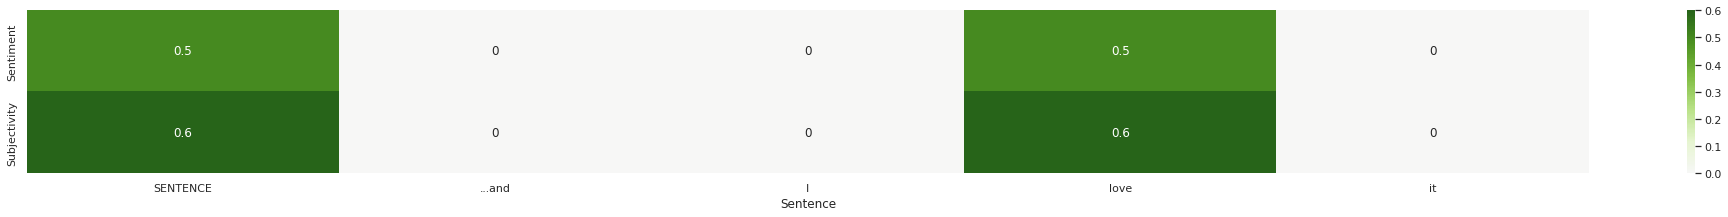

In [ ]:
cm4 = Cm_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in cm4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = cm4['Replies'] + cm4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(cm4['Replies'] + cm4['Likes'])

  acc_score = acc_score + a
  
print(positive1 , negative1 , neutral1)

Influence_CM = (( 140 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_CM,acc_score)

##4) xg_boost Algorithma 


In [ ]:
cm5 = Cm_base
neg = 0
pos = 0
acc_score = 0

for tweet in cm5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
    a = -(cm5['Replies'] + cm5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = cm5['Replies'] + cm5['Likes'] 

  acc_score = acc_score + a
  

print(pos , neg)
Influence_CM = (( 140 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_CM,acc_score)

{'sentiment': 1}


TypeError: ignored

#Jack Nicklaus

In [ ]:
JN = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JackNicklaus.csv')
JN


,Name,Date,Tweet,Replies,Retweets,Likes
0,David Creel,"Oct 29, 2020",NaN,4.0,1,254
1,Corey Troxell,"Oct 29, 2020",Sorry Jack. You just forfeited your,43.0,3,273
2,C. Redhead Extraordinaire,"Oct 29, 2020",Russia & teens have such a hard time with this:,18.0,5,298
3,Mike Rodman,"Oct 29, 2020","It's nice to be wealthy, white, and male. You ...",272.0,151,3.9K
4,Sam,"Oct 29, 2020",NaN,1.0,NaN,27
...,...,...,...,...,...,...
172,SAOT,"Oct 30, 2020",Jack the fact that U can overlook his separati...,3.0,1,23
173,debby coyle,"Oct 30, 2020","Wow, seriously disappointed in you Jack",1.0,NaN,8
174,Hazel the McWitch,"Oct 30, 2020",From an outward perspective from the UK I can ...,NaN,NaN,8
175,Tim Beers,"Oct 30, 2020",No longer a fan. Disappointed that Nicklaus wo...,1.0,NaN,37


In [ ]:
jn1 = JN.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jn1.replace("", nan_value, inplace=True)
jn1.dropna(subset = ["Tweet"], inplace=True)

jn1['Replies'] = jn1['Replies'].fillna(0)
jn1['Likes'] = jn1['Likes'].fillna(0)
jn1['Retweets'] = jn1['Retweets'].fillna(0)

Jn_base = jn1
Jn_base


index = Jn_base.index
number_of_rows = len(index)
print(number_of_rows)

150


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/pytho

##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in jn1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jn1['Sent'] = sentiment
jn1['Score'] = confidence
jn1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,Tweet,Replies,Retweets,Likes,Sent,Score
1,Corey Troxell,"Oct 29, 2020",Sorry Jack. You just forfeited your,43.0,3,273,NEGATIVE,0.996135
2,C. Redhead Extraordinaire,"Oct 29, 2020",Russia & teens have such a hard time with this:,18.0,5,298,POSITIVE,0.599041
3,Mike Rodman,"Oct 29, 2020","It's nice to be wealthy, white, and male. You ...",272.0,151,3.9K,NEGATIVE,0.700881
5,Colin Fraser,"Oct 29, 2020","As a big fan of yours, this was unfortunately ...",194.0,34,1.4K,NEGATIVE,0.798604
6,Mark Steitz,"Oct 29, 2020",Well said. I'll be casting my vote for,31.0,3,181,POSITIVE,0.779493
...,...,...,...,...,...,...,...,...
172,SAOT,"Oct 30, 2020",Jack the fact that U can overlook his separati...,3.0,1,23,NEGATIVE,0.536459
173,debby coyle,"Oct 30, 2020","Wow, seriously disappointed in you Jack",1.0,0,8,NEGATIVE,0.995388
174,Hazel the McWitch,"Oct 30, 2020",From an outward perspective from the UK I can ...,0.0,0,8,NEGATIVE,0.967425
175,Tim Beers,"Oct 30, 2020",No longer a fan. Disappointed that Nicklaus wo...,1.0,0,37,NEGATIVE,0.998819


In [ ]:
Positive = 0
Negative = 0
acc_score = 0

for c in jn1['Sent']:
  if c == 'POSITIVE':
    a = jn1['Replies'] + jn1['Likes']
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
    a = -(jn1['Replies'] + jn1['Likes'])
    
  acc_score = acc_score + a

Retweet = 21200

total_likes = 95100

print(Positive , Negative)

Influence_JN = ((150 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JN,acc_score)

TypeError: ignored

##2) NKTL

{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.0772}
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.222, 'neu': 0.678, 'pos': 0.1, 'compound': -0.7587}
{'neg': 0.261, 'neu': 0.489, 'pos': 0.25, 'compound': -0.0516}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
{'neg': 0.142, 'neu': 0.577, 'pos': 0.282, 'compound': 0.7885}
{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.6597}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
{'neg': 0.172, 'neu': 0.588, 'pos': 0.24, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.7304}
{'neg': 0.08, 'neu': 0.426, 'pos': 0.495, 'compound': 0.9393}


TypeError: ignored

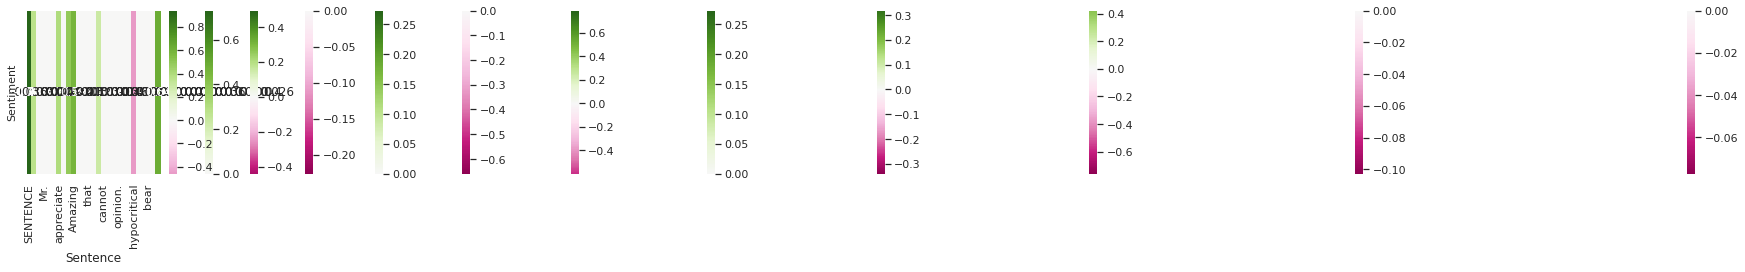

In [ ]:

jn3 = Jn_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in jn3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])

  var = max(lst)

  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = jn3['Replies'] + jn3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(jn3['Replies'] + jn3['Likes'])
    negative += 1

  acc_score = acc_score + a


print(positive , negative , neutral)

Influence_JN = ((150 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_JN,acc_score)

##3) Textblob

In [ ]:
jn4 = Jn_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0 


for tweet in jn4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = jn4['Replies'] + jn4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(jn4['Replies'] + jn4['Likes'])

  acc_score = acc_score + a
  
print(positive1 , negative1 , neutral1)

Influence_JN = ((150 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_JN,acc_score )

##4) xg_boost algorithma

In [ ]:
jn5 = Jn_base
neg = 0
pos = 0
acc_score = 0


for tweet in jn5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
    a = -(jn5['Replies'] + jn5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = jn5['Replies'] + jn5['Likes'] 
  

  acc_score = acc_score + a

  
print(pos ,neg)
Influence_JN = ((150 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JN,acc_score)

{'sentiment': 1}


TypeError: ignored

#Kristie Alley

In [ ]:
KA = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/KristieAlley.csv')
KA

,Tweet,Name,Date,Replies,Retweets,Likes
0,NaN,Kirstie Alley,NaN,NaN,NaN,NaN
1,NaN,Brian McDonald,"Oct 18, 2020",51,8,33
2,Wait are you fucking serious?,"Rachel, RN","Oct 18, 2020",24,4,375
3,"He's not a politician, he's something worse. I...",Jerry Rice,"Oct 18, 2020",29,1,107
4,"Yes, he gets things done quickly! Just look at...",TottenVillain,"Oct 18, 2020",390,255,7.9K
...,...,...,...,...,...,...
168,No. He's a kidnapper and killer.,Ray Bosworth,"Oct 21, 2020",1,NaN,4
169,Most Criminal Indictments in his administratio...,benson,"Oct 21, 2020",NaN,2,17
170,"You're right, he ""turned the",Riki Jones,"Oct 21, 2020",1,NaN,7
171,He does things quickly? We’ve been waiting fo...,Shannon M. Vaughn,"Oct 21, 2020",1,1,2


In [ ]:
ka1 = KA.dropna(subset=['Tweet'])
ka1.head(20)

,Tweet,Name,Date,Replies,Retweets,Likes
2,Wait are you fucking serious?,"Rachel, RN","Oct 18, 2020",24,4,375
3,"He's not a politician, he's something worse. I...",Jerry Rice,"Oct 18, 2020",29,1,107
4,"Yes, he gets things done quickly! Just look at...",TottenVillain,"Oct 18, 2020",390,255,7.9K
5,Yes Please join,Lidavalie,"Oct 18, 2020",1,NaN,1
6,This four year experiment has failed. Over 200...,"marjorie, not that marjorie","Oct 18, 2020",2,1,10
7,"Thank you for the explanation, Kirstie. I stru...",Ann C from Maine,"Oct 18, 2020",143,14,446
8,"He certainly has done away with 220,000 Americ...",DebDebya,"Oct 18, 2020",70,53,779
10,I agree. He thinks like a business man and it ...,David H,"Oct 18, 2020",688,26,333
11,Me too. Exactly the same reason. If I could f...,Susan McCulley,"Oct 18, 2020",13,3,38
12,Only thing he quickly got done is crashing the...,Paul54,"Oct 18, 2020",47,9,220


In [ ]:
def convert_str_to_number(x):
    x = str(x)
    total_stars = 0
    num_map = {'K':1000, 'M':1000000, 'B':1000000000}
    if x.isdigit():
        total_stars = int(x)
    else:
        if len(x) > 1:
            total_stars = float(x[:-1]) * num_map.get(x[-1].upper(), 1)
    return int(total_stars)



nan_value = float("NaN")
# Convert NaN values to empty string
ka1.replace("", nan_value, inplace=True)
ka1.dropna(subset = ["Tweet"], inplace=True)



ka1['Replies'] = ka1['Replies'].fillna(0)
ka1['Likes'] = ka1['Likes'].fillna(0)
ka1['Retweets'] =ka1['Retweets'].fillna(0)

# ka1.Retweets = (ka1.Retweets.replace(r'[KM]+$', '', regex=True).astype(float) *\
#           ka1.Retweets.str.extract(r'[\d\.]+([KM]+)', expand=False)
#           .fillna(1)
#           .replace(['K','M'], [10**3, 10**6]).astype(float))

# ka1.Likes = (ka1.Likes.replace(r'[KM]+$', '', regex=True).astype(float) *\
#           ka1.Likes.str.extract(r'[\d\.]+([KM]+)', expand=False)
#           .fillna(1)
#           .replace(['K','M'], [10**3, 10**6]).astype(float))

ka1['Retweets'] = ka1['Retweets'].apply(lambda x: convert_str_to_number(x))
ka1['Replies'] = ka1['Replies'].apply(lambda x: convert_str_to_number(x))
ka1['Likes'] = ka1['Likes'].apply(lambda x: convert_str_to_number(x))


# ka1['Retweets'] = pd.to_numeric(ka1['Retweets'], downcast="float")
# ka1['Likes'] = pd.to_numeric(ka1['Likes'], downcast="float")
# ka1['Replies'] = pd.to_numeric(ka1['Replies'], downcast="float")


Ka_base = ka1
Ka_base


index = Ka_base.index
number_of_rows = len(index)
print(number_of_rows)

156


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-package

In [ ]:
ka1.head(20)

,Tweet,Name,Date,Replies,Retweets,Likes
2,Wait are you fucking serious?,"Rachel, RN","Oct 18, 2020",24,4,375
3,"He's not a politician, he's something worse. I...",Jerry Rice,"Oct 18, 2020",29,1,107
4,"Yes, he gets things done quickly! Just look at...",TottenVillain,"Oct 18, 2020",390,255,7900
5,Yes Please join,Lidavalie,"Oct 18, 2020",1,0,1
6,This four year experiment has failed. Over 200...,"marjorie, not that marjorie","Oct 18, 2020",2,1,10
7,"Thank you for the explanation, Kirstie. I stru...",Ann C from Maine,"Oct 18, 2020",143,14,446
8,"He certainly has done away with 220,000 Americ...",DebDebya,"Oct 18, 2020",70,53,779
10,I agree. He thinks like a business man and it ...,David H,"Oct 18, 2020",688,26,333
11,Me too. Exactly the same reason. If I could f...,Susan McCulley,"Oct 18, 2020",13,3,38
12,Only thing he quickly got done is crashing the...,Paul54,"Oct 18, 2020",47,9,220


##1)flair

In [ ]:
sentiment =[]
confidence = []

for tweet in ka1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


ka1['Sent'] = sentiment
ka1['Score'] = confidence
ka1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tweet,Name,Date,Replies,Retweets,Likes,Sent,Score
2,Wait are you fucking serious?,"Rachel, RN","Oct 18, 2020",24,4,375,NEGATIVE,0.895284
3,"He's not a politician, he's something worse. I...",Jerry Rice,"Oct 18, 2020",29,1,107,NEGATIVE,0.992652
4,"Yes, he gets things done quickly! Just look at...",TottenVillain,"Oct 18, 2020",390,255,7900,POSITIVE,0.923718
5,Yes Please join,Lidavalie,"Oct 18, 2020",1,0,1,POSITIVE,0.649313
6,This four year experiment has failed. Over 200...,"marjorie, not that marjorie","Oct 18, 2020",2,1,10,NEGATIVE,0.999890
...,...,...,...,...,...,...,...,...
168,No. He's a kidnapper and killer.,Ray Bosworth,"Oct 21, 2020",1,0,4,POSITIVE,0.866845
169,Most Criminal Indictments in his administratio...,benson,"Oct 21, 2020",0,2,17,POSITIVE,0.756967
170,"You're right, he ""turned the",Riki Jones,"Oct 21, 2020",1,0,7,POSITIVE,0.594171
171,He does things quickly? We’ve been waiting fo...,Shannon M. Vaughn,"Oct 21, 2020",1,1,2,NEGATIVE,0.675244


In [ ]:
Positive = 0
Negative = 0
acc_score = 0

a =0



for c in ka1['Sent']:
  if c == 'POSITIVE':
    a = ka1['Replies'] + ka1['Likes']
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
    a = -(ka1['Replies'] + ka1['Likes'])
    
  acc_score = acc_score + a

Retweet = 26258

total_likes = 202600 

print(Positive , Negative)

Influence_KA = ((156 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_KA,acc_score)

59 97
222930 2      -15162
3       -5168
4     -315020
5         -76
6        -456
        ...  
168      -190
169      -646
170      -304
171      -114
172      -380
Length: 156, dtype: int64


##2) NKTL

In [ ]:
ka3 = Ka_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in ka3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])

  var = max(lst)

  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = ka3['Replies'] + ka3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(ka3['Replies'] + ka3['Likes'])
    negative += 1

  acc_score = acc_score + a

  
print(positive , negative , neutral)

Influence_KA = (( 156* (positive-negative)) + (total_likes+Retweet)) 

print(Influence_KA,acc_score)

NameError: ignored

##3) Textblob

In [ ]:
ka4 = Ka_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in ka4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = ka4['Replies'] + ka4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(ka4['Replies'] + ka4['Likes'])

  acc_score = acc_score + a

print(positive1 , negative1 , neutral1)

Influence_KA = (( 156* (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_KA,acc_score)

##4 ) xg_boost algorithma 

In [ ]:
ka5 = Ka_base
neg = 0
pos = 0

acc_score = 0

for tweet in ka5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
 if var['sentiment'] == 0:
    neg +=1
    a = -(ka5['Replies'] + ka5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = ka5['Replies'] + ka5['Likes'] 
  

  acc_score = acc_score + a

print(pos , neg)
Influence_KA = (( 156 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_KA,acc_score)

#James Woods

In [ ]:
JW = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JamesWoods.csv')
JW

In [ ]:
jw1 = JW.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jw1.replace("", nan_value, inplace=True)
jw1.dropna(subset = ["Tweet"], inplace=True)

jw1['Replies'] = jw1['Replies'].fillna(0)
jw1['Likes'] = jw1['Likes'].fillna(0)
jw1['Retweets'] = jw1['Retweets'].fillna(0)

Jw_base = jw1
Jw_base


index = Jw_base.index
number_of_rows = len(index)
print(number_of_rows)

##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in jw1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jw1['Sent'] = sentiment
jw1['Score'] = confidence
jw1

In [ ]:
Positive = 0
Negative = 0
acc_score = 0

for c in jw1['Sent']:
  if c == 'POSITIVE':
    a = jw1['Replies'] + jw1['Likes']
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
    a = -(jw1['Replies'] + jw1['Likes'])
  acc_score = acc_score + a

Retweet = 29300

total_likes = 95100

print(Positive , Negative)

Influence_JW = ((135 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JW,acc_score)

##2) NKTL



In [ ]:
jw3 = Jw_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in jw3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = jw3['Replies'] + jw3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(jw3['Replies'] + jw3['Likes'])
    negative += 1

  acc_score = acc_score + a

print(positive , negative , neutral)

Influence_JW = ((135 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_JW,acc_score)

##3) textblob


In [ ]:
jw4 = Jw_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in jw4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = jw4['Replies'] + jw4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(jw4['Replies'] + jw4['Likes'])

  acc_score = acc_score + a
  

print(positive1 , negative1 , neutral1)
Influence_JW = (( 135 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_JW,acc_score)

## xg_boost alogorithma

In [ ]:
jw5 = Jw_base
neg = 0
pos = 0
acc_score = 0

for tweet in jw5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
   if var['sentiment'] == 0:
    neg +=1
    a = -(jw5['Replies'] + jw5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = jw5['Replies'] + jw5['Likes'] 
  

  acc_score = acc_score + a


print(pos , neg)
Influence_JW = (( 135* (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JW,acc_score)

#Lil Wayne

In [ ]:
LW = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/LilWayne.csv')
LW


,Name,Date,ReplyingTo,Tweet,Replies,Retweets,Likes
0,Justin Jaws 44 (@),"Oct 30, 2020",trump has done zero for black folks for four y...,NaN,NaN,NaN,NaN
1,Host Body Rachelle,"Oct 30, 2020",Don't be surprised. The Trump campaign recentl...,NaN,NaN,NaN,NaN
2,Levi. D,"Oct 30, 2020",I’m a Trump fan and this made me laugh so loud,NaN,NaN,NaN,NaN
3,Levi. D,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Yeah trumps gonna win.,5.0,NaN,71
4,North™,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,It’s hilarious how so many celebs will say som...,10.0,1.0,125
...,...,...,...,...,...,...,...
107,UnapologeticallyQueen,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,"Well, that worked out well.",NaN,NaN,9
108,yowanna,"Nov 12, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,thank you for this. now I have an excuse for w...,1.0,NaN,39
109,nerf,"Nov 24, 2020",you might want to worry about your non existen...,NaN,NaN,NaN,NaN
110,Baby T,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,L,NaN,NaN,1


In [ ]:
lw1 = LW.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
lw1.replace("", nan_value, inplace=True)
lw1.dropna(subset = ["Tweet"], inplace=True)

lw1['Replies'] = lw1['Replies'].fillna(0)
lw1['Likes'] = lw1['Likes'].fillna(0)
lw1['Retweets'] = lw1['Retweets'].fillna(0)

lw1.Retweets = (lw1.Retweets.replace(r'[KM]+$', '', regex=True).astype(float) *\
          lw1.Retweets.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(float))

lw1.Likes = (lw1.Likes.replace(r'[KM]+$', '', regex=True).astype(float) *\
          lw1.Likes.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(float))

Lw_base = lw1
Lw_base


index = Lw_base.index
number_of_rows = len(index)
print(number_of_rows)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/pytho

AttributeError: ignored

##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in lw1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


lw1['Sent'] = sentiment
lw1['Score'] = confidence
lw1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,ReplyingTo,Tweet,Replies,Retweets,Likes,Sent,Score
3,Levi. D,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Yeah trumps gonna win.,5.0,0.0,71,POSITIVE,0.817929
4,North™,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,It’s hilarious how so many celebs will say som...,10.0,1.0,125,POSITIVE,0.822753
5,PRINCE,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Y’all he’s not speaking as a black man. He’s s...,155.0,139.0,3.7K,NEGATIVE,0.729618
7,Shay,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,I have no words for the betrayal that is happe...,22.0,2.0,75,NEGATIVE,0.842894
10,Shamar English,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,A lot of these rappers are sellouts. Rappers l...,45.0,25.0,189,NEGATIVE,0.875075
...,...,...,...,...,...,...,...,...,...
105,Luis Soto,"Nov 5, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,This sellout & many other rich black men like ...,1.0,0.0,8,NEGATIVE,0.957369
106,Lukas Lütz,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,My heart broke in this moment mr. Carter can’t...,0.0,0.0,5,NEGATIVE,0.948963
107,UnapologeticallyQueen,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,"Well, that worked out well.",0.0,0.0,9,POSITIVE,0.994980
108,yowanna,"Nov 12, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,thank you for this. now I have an excuse for w...,1.0,0.0,39,NEGATIVE,0.780206


In [ ]:
Positive = 0
Negative = 0
acc_score = 0

for c in lw1['Sent']:
  if c == 'POSITIVE':
    a = lw1['Replies'] + lw1['Likes']
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
    a = -(lw1['Replies'] + lw1['Likes'])
  acc_score = acc_score + a

Retweet = 235000

total_likes = 4092000

print(Positive , Negative )

Influence_LW = ((78* (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_LW,acc_score)

TypeError: ignored

##2) NKTL

{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.7184}
{'neg': 0.084, 'neu': 0.797, 'pos': 0.118, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}
{'neg': 0.162, 'neu': 0.676, 'pos': 0.161, 'compound': -0.0108}
{'neg': 0.071, 'neu': 0.842, 'pos': 0.087, 'compound': -0.0935}
{'neg': 0.406, 'neu': 0.391, 'pos': 0.203, 'compound': -0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.1027}
{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.385, 'neu': 0.385, 'pos': 0.231, 'compound': -0.25}
{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.9147}
{'neg': 0.151, 'neu': 0.752, 'pos': 0.098, 'compound': -0.5593}
{'neg': 0.672, 'neu': 0.0, 'pos': 0.328, 'compound': -0.5599}
{'neg': 0.082, 'neu': 0.595, 'pos': 0.323, 'compound': 0.7579}
{'neg': 0.102, 'neu': 0.898,

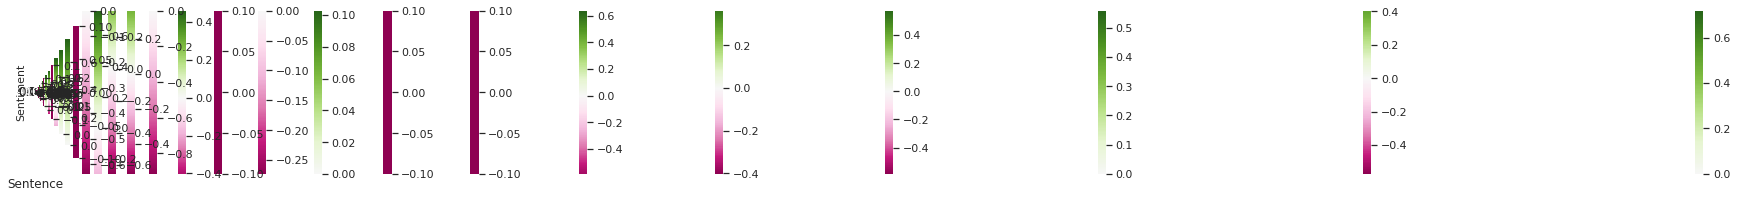

In [ ]:
lw3 = Lw_base
negative = 0
positive = 0
neutral = 0
acc_score = 0

for tweet in lw3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])

 var = max(lst)

  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    a = lw3['Replies'] + lw3['Likes']
    positive += 1
  if(var == name['neg'] ):
    a = -(lw3['Replies'] + lw3['Likes'])
    negative += 1

  acc_score = acc_score + a

print(positive , negative , neutral)
Influence_LW = (( 78 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_LW,acc_score)

##3) textblob

Sentiment(polarity=0.8, subjectivity=0.4)
Sentiment(polarity=0.09714285714285713, subjectivity=0.7071428571428571)
Sentiment(polarity=0.10416666666666667, subjectivity=0.5916666666666667)
Sentiment(polarity=0.06666666666666667, subjectivity=0.31666666666666665)
Sentiment(polarity=0.16190476190476188, subjectivity=0.7333333333333334)
Sentiment(polarity=0.0, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.11249999999999999, subjectivity=0.6124999999999999)
Sentiment(polarity=-0.23333333333333334, subjectivity=0.4666666666666667)
Sentiment(polarity=-0.78125, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentimen

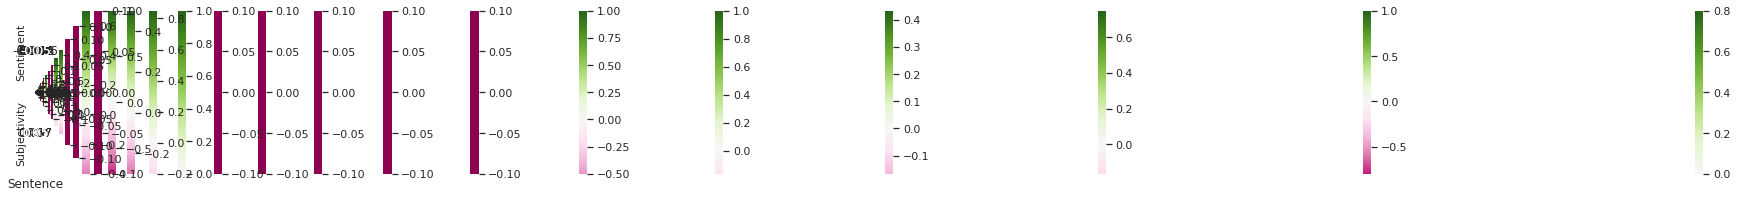

In [ ]:
lw4 = Lw_base
negative1 = 0
positive1 = 0
neutral1 = 0
acc_score = 0


for tweet in lw4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
   print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
    a = lw4['Replies'] + lw4['Likes']
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
    a = -(lw4['Replies'] + lw4['Likes'])

  acc_score = acc_score + a



print(positive1 , negative1 , neutral1)
Influence_LW = (( 78 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_LW,acc_score)

##4)xg_boost algorithma

In [ ]:
lw5 = Lw_base
neg = 0
pos = 0
acc_score = 0


for tweet in lw5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
   if var['sentiment'] == 0:
    neg +=1
    a = -(lw5['Replies'] + lw5['Likes'] )
    
  if var['sentiment'] == 1:
    pos +=1
    a = lw5['Replies'] + lw5['Likes']

  acc_score = acc_score + a 

print(pos ,neg)
Influence_LW = (( 78 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_LW,acc_score)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
print("BIDEN SUPPORTERS")
print(" ")
x.field_names = ["Celebrity Name", "Flair", "NLTK", "TextBlob","XGboost","Number of Tweets"]

x.add_row(["Dwayne Jonson",  451881, 449466, 455423,470235 ,161])
x.add_row(["Taylor Swift", 467480, 460428,467808,481584,164])
x.add_row(["Mark Cuban", 9799,11299,13549,26299,125])
x.add_row(["John Legend ", 15202,13283,14798,21464,101])
x.add_row(["Jennifer Hudson", 2974,12004,12139,12598,27])
print(x)

y = PrettyTable()
print("TRUMP SUPPORTERS")
print(" ")
y.field_names = ["Celebrity Name", "Flair", "NLTK", "TextBlob","XGboost","Number of Tweets"]
y.add_row(["Conor Mcgregor",115000,119900,122980,137680,140])
y.add_row(["Jack Nicklaus", 113600,116150,119000,137000,150])
y.add_row(["Kristie Alley", 222930,229638,235098,249762,156])
y.add_row(["James Woods", 122915,229668,233583,246273,135])
y.add_row(["Lil Wayne", 4327000,4326766,4327624,4332772,78])
print(y)

BIDEN SUPPORTERS
 
+-----------------+--------+--------+----------+---------+------------------+
|  Celebrity Name | Flair  |  NLTK  | TextBlob | XGboost | Number of Tweets |
+-----------------+--------+--------+----------+---------+------------------+
|  Dwayne Jonson  | 451881 | 449466 |  455423  |  470235 |       161        |
|   Taylor Swift  | 467480 | 460428 |  467808  |  481584 |       164        |
|    Mark Cuban   |  9799  | 11299  |  13549   |  26299  |       125        |
|   John Legend   | 15202  | 13283  |  14798   |  21464  |       101        |
| Jennifer Hudson |  2974  | 12004  |  12139   |  12598  |        27        |
+-----------------+--------+--------+----------+---------+------------------+
TRUMP SUPPORTERS
 
+----------------+---------+---------+----------+---------+------------------+
| Celebrity Name |  Flair  |   NLTK  | TextBlob | XGboost | Number of Tweets |
+----------------+---------+---------+----------+---------+------------------+
| Conor Mcgregor |  115

In [ ]:
print("Celebrities Influence : Biden")
print(" ")
print("Flair Model    :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")
print("NLTK Model     :  Taylor Swift > Dwayne Jonson > John Legend > Jennifer Hudson > Mark Cuban")
print("Textblob Model :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")
print("Xgboost Model  :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")

Celebrities Influence : Biden
 
Flair Model    :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson
NLTK Model     :  Taylor Swift > Dwayne Jonson > John Legend > Jennifer Hudson > Mark Cuban
Textblob Model :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson
Xgboost Model  :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson


In [ ]:
print("Celebrities Influence : Trump")
print(" ")
print("Flair Model    :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")
print("NLTK Model     :  Lil Wayne > James Woods > Kristie Alley > Conor Mcgregor > Jack Nicklaus")
print("Textblob Model :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")
print("Xgboost Model  :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")

Celebrities Influence : Trump
 
Flair Model    :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
NLTK Model     :  Lil Wayne > James Woods > Kristie Alley > Conor Mcgregor > Jack Nicklaus
Textblob Model :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
Xgboost Model  :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
